In [1]:
import pandas as pd

In [2]:
import sklearn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [7]:
dataset = pd.read_csv("Social_Network_Ads (1).csv")
dataset

User ID  Gender   Age  EstimatedSalary  Purchased
0    15624510    Male  19.0          19000.0          0
1    15810944    Male  35.0          20000.0          0
2    15668575  Female  26.0          43000.0          0
3    15603246  Female  27.0          57000.0          0
4    15804002    Male  19.0          76000.0          0
..        ...     ...   ...              ...        ...
395  15691863  Female  46.0          41000.0          1
396  15706071    Male  51.0          23000.0          1
397  15654296  Female  50.0          20000.0          1
398  15755018    Male  36.0          33000.0          0
399  15594041  Female  49.0          36000.0          1

[400 rows x 5 columns]

In [8]:
dataset.shape

(400, 5)

In [9]:
df=dataset.isnull().sum()

In [10]:
dataset.describe()

User ID         Age  EstimatedSalary   Purchased
count  4.000000e+02  400.000000       400.000000  400.000000
mean   1.569154e+07   37.655000     69742.500000    0.357500
std    7.165832e+04   10.482877     34096.960282    0.479864
min    1.556669e+07   18.000000     15000.000000    0.000000
25%    1.562676e+07   29.750000     43000.000000    0.000000
50%    1.569434e+07   37.000000     70000.000000    0.000000
75%    1.575036e+07   46.000000     88000.000000    1.000000
max    1.581524e+07   60.000000    150000.000000    1.000000

In [11]:
dataset.dtypes

User ID              int64
Gender              object
Age                float64
EstimatedSalary    float64
Purchased            int64
dtype: object

In [12]:
dataset.drop_duplicates()

User ID  Gender   Age  EstimatedSalary  Purchased
0    15624510    Male  19.0          19000.0          0
1    15810944    Male  35.0          20000.0          0
2    15668575  Female  26.0          43000.0          0
3    15603246  Female  27.0          57000.0          0
4    15804002    Male  19.0          76000.0          0
..        ...     ...   ...              ...        ...
395  15691863  Female  46.0          41000.0          1
396  15706071    Male  51.0          23000.0          1
397  15654296  Female  50.0          20000.0          1
398  15755018    Male  36.0          33000.0          0
399  15594041  Female  49.0          36000.0          1

[400 rows x 5 columns]

In [13]:
dataset.shape

(400, 5)

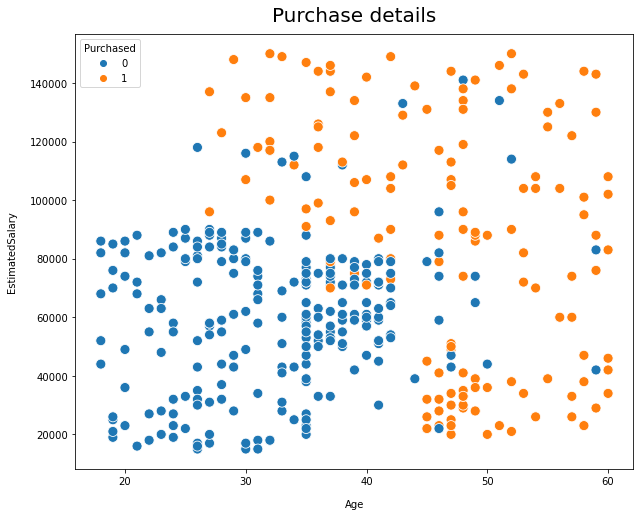

In [14]:
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Age',y='EstimatedSalary',hue='Purchased',data=dataset,s=100)
plt.title("Purchase details",y=1.015, fontsize=20)
plt.xlabel("Age",labelpad=13)
plt.ylabel("EstimatedSalary", labelpad = 13)
ax=plt.gca()

In [15]:
from sklearn.model_selection import train_test_split
x=dataset[['Age','EstimatedSalary']].values
y=dataset['Purchased'].values


In [18]:
from sklearn.preprocessing import StandardScaler

scaler.fit(X_train)
x_train_scaled  =  scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LogisticRegression
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred = logistic_regression.predict(X_test)

In [23]:
logistic_regression.coef_

array([[-2.23102744e-09, -2.07854462e-06]])

In [24]:
logistic_regression.intercept_

array([-2.12654828e-10])

In [25]:
logistic_regression.predict([[20,30000]])

array([0], dtype=int64)

In [26]:
logistic_regression.predict_proba([[20,30000]])

array([[0.51558405, 0.48441595]])

In [27]:
from sklearn.metrics import plot_roc_curve, confusion_matrix, f1_score,precision_score,recall_score,accuracy_score
cm = metrics.confusion_matrix(y_test,y_pred)
cm
tn, fp, fn, tp = cm.ravel()
(tn, fp, fn, tp)

(68, 0, 32, 0)

In [28]:
cm_df = pd.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
cm_df

Predicted Negative  Predicted Positive
Actual Negative                  68                   0
Actual Positive                  32                   0

precision_score: 0.0
recall_score: 0.0
accuracy_score: 0.68
f1_score: 0.0


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


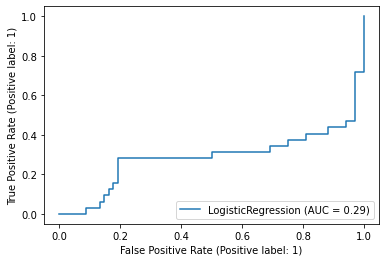

In [29]:
p=metrics.precision_score(y_test, y_pred)
r=metrics.recall_score(y_test, y_pred)
a=metrics.accuracy_score(y_test, y_pred)
f1=metrics.f1_score(y_test, y_pred)
print("precision_score:",p)
print("recall_score:",r)
print("accuracy_score:",a)
print("f1_score:",f1)
metrics.plot_roc_curve(logistic_regression,X_test,y_test)

In [30]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      1.00      0.81        68
           1       0.00      0.00      0.00        32

    accuracy                           0.68       100
   macro avg       0.34      0.50      0.40       100
weighted avg       0.46      0.68      0.55       100



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(6.0, 0.5, 'Predicted Label')

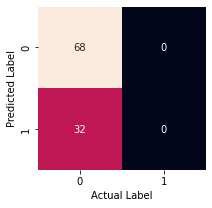

In [31]:
fig,ax=plt.subplots(figsize=(3,3))
ax=sns.heatmap(cm,annot=True,cbar=False)
plt.xlabel("Actual Label")
plt.ylabel("Predicted Label")

In [32]:
err=(fn+fp)/(tn+fp+fn+tp)
err

0.32